<a href="https://colab.research.google.com/github/crewtool/ibm_cloud_mimuw2020/blob/master/3_4_flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,16614,24464,23418,134358,43479,57315,62716,132030,120543,115901,89211.0
1,15927,35888,26678,213906,62851,69312,87752,160476,155734,142768,122430.0
2,16607,52820,30087,209903,68099,75211,98326,228451,162975,158756,127696.0
3,15298,69512,36576,219511,94506,112753,118525,363583,259405,227951,204726.0
4,15820,69839,33003,150439,82817,128321,152666,290771,242959,236454,193482.0
5,16015,67827,36428,135150,86595,139877,211636,249600,271777,250131,200194.0
6,13345,60643,30235,109313,93722,148640,212660,192655,269682,199472,211983.0
7,12341,47829,34136,77151,96752,174015,187092,150952,248016,158698,215994.0
8,12749,51951,36059,87372,111154,178988,184161,135087,255812,155213,211572.0
9,16989,56969,39499,100518,116170,170181,188978,136308,264781,157867,NaN


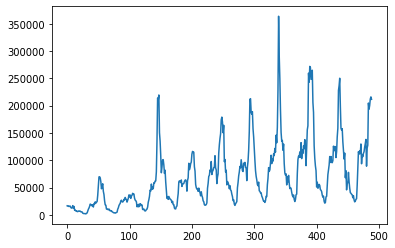

In [2]:
#Data from http://wwwold.pzh.gov.pl/oldpage/epimeld/grypa/index.htm
#Used idea from to extract data http://www.deltami.edu.pl/delta/archiwum/2019/10/2019/09/30/2019-10-delta.pdf
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv('flu.csv', sep=',')

plt.plot(df.to_numpy().T.flatten() )
df


In [0]:
def KMcK(a, b, S_1, I_1, R_1, n):
    S = [S_1]
    I = [I_1]
    R = [R_1]

    b = b[0]
 
    for t in range(n-1):
        S.append( (S[t] - b * I[t] * S[t]))
        I.append( (I[t] + b * I[t] * S[t] - a * I[t]))
        R.append( R[t] + a * I[t])
    return np.array(S), np.array(I), np.array(R) 

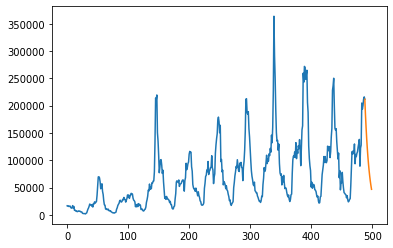

In [6]:
def predict_with_KMcK(b,start):
  a = 0.4
  population  = 38000000
  S, I, R = KMcK(a,b, population - start , start, 0, 12)
  return I
  
from scipy.optimize import leastsq

q2 = df.drop('2020', axis=1)[9:21]
def year(y):
  return ( lambda b: (predict_with_KMcK(b,np.array(q2[str(y)])[0]) - q2[str(y)]) ) 


bs = []
for y in range(2010, 2020):
  bs.append( leastsq(year(y), 0)[0] )

average = np.average(bs)
start = round( np.array(df['2020'])[8] )

predicted = predict_with_KMcK( [average], int(start) )

predicted = np.array( [ round(x) for x in predicted] )

plt.plot(df.to_numpy().T.flatten())
plt.plot(range(488,500),predicted)

plt.show()